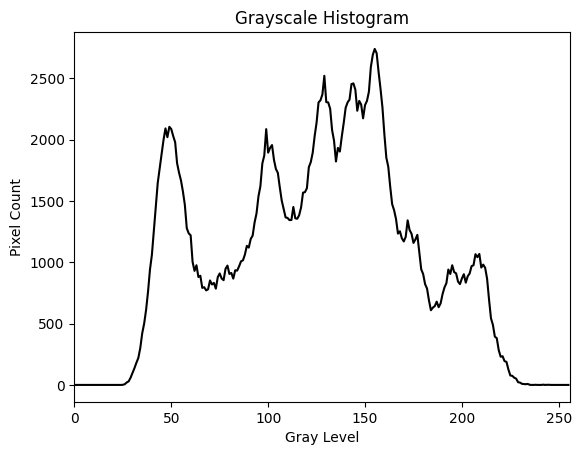

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "lena.png"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Pixel Count")
plt.plot(hist, color='k')
plt.xlim([0, 256])
plt.show()



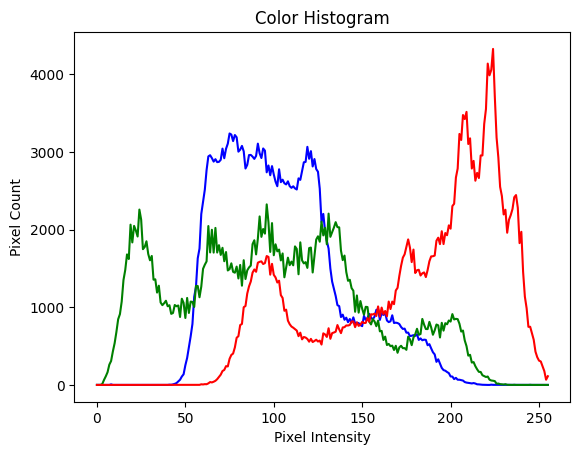

In [ ]:
colors = ('b', 'g', 'r')
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.show()



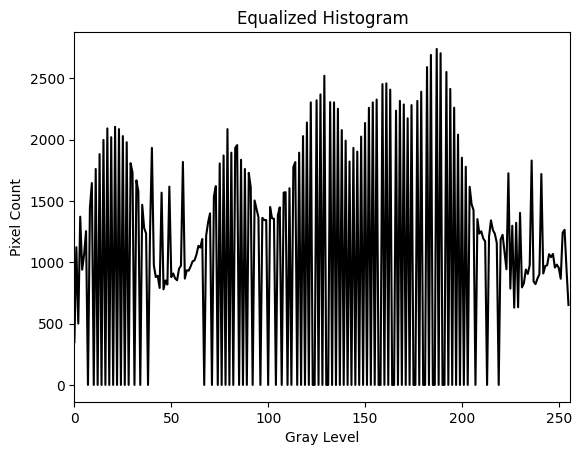

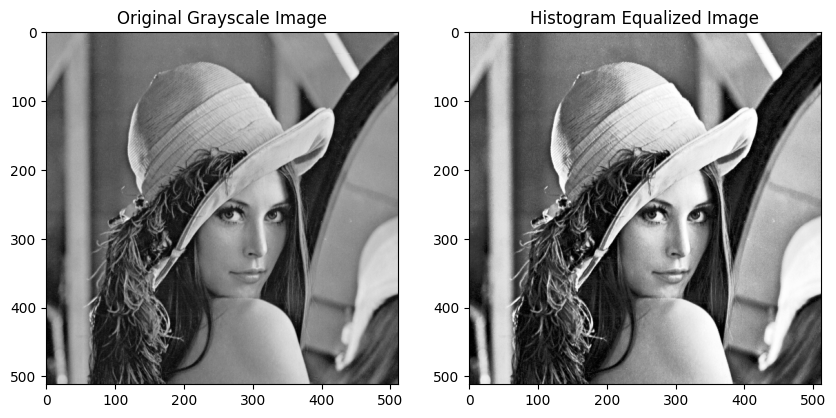

In [ ]:
# Histogram Equalization
equalized = cv2.equalizeHist(gray)
hist_eq = cv2.calcHist([equalized], [0], None, [256], [0, 256])
plt.figure()
plt.title("Equalized Histogram")
plt.xlabel("Gray Level")
plt.ylabel("Pixel Count")
plt.plot(hist_eq, color='k')
plt.xlim([0, 256])
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.show()



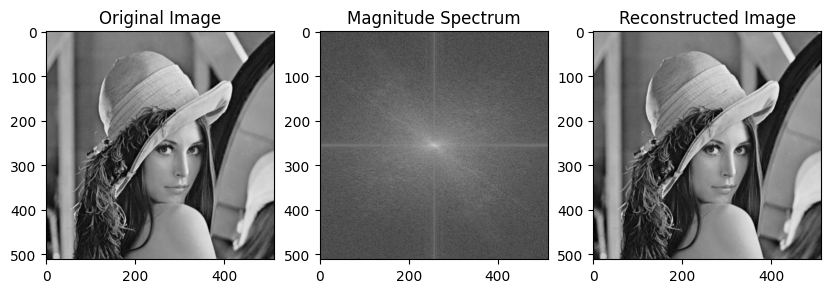

In [ ]:
image_gray = cv2.imread(image_path, 0)
dft = np.fft.fft2(image_gray)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

idft_shift = np.fft.ifftshift(dft_shift)
reconstructed = np.fft.ifft2(idft_shift)
reconstructed = np.abs(reconstructed)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")

plt.subplot(1,3,3)
plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.show()



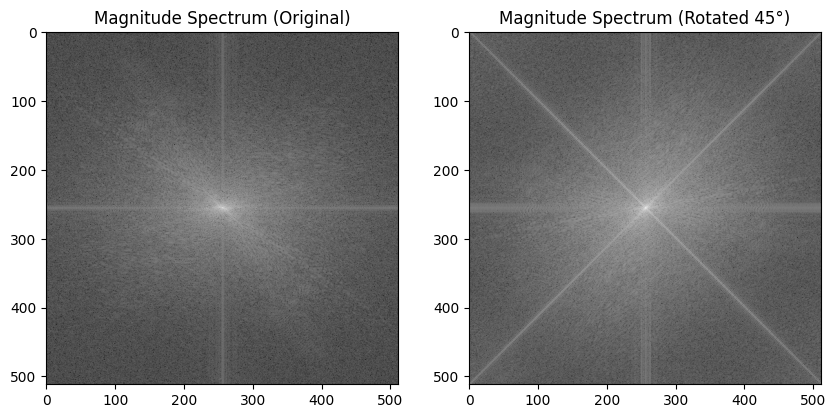

In [ ]:
rows, cols = image_gray.shape
M = cv2.getRotationMatrix2D((cols//2, rows//2), 45, 1)
rotated_image = cv2.warpAffine(image_gray, M, (cols, rows))

dft_orig = np.fft.fftshift(np.fft.fft2(image_gray))
dft_rot = np.fft.fftshift(np.fft.fft2(rotated_image))

mag_spectrum_orig = 20 * np.log(np.abs(dft_orig))
mag_spectrum_rot = 20 * np.log(np.abs(dft_rot))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(mag_spectrum_orig, cmap='gray')
plt.title("Magnitude Spectrum (Original)")

plt.subplot(1,2,2)
plt.imshow(mag_spectrum_rot, cmap='gray')
plt.title("Magnitude Spectrum (Rotated 45°)")
plt.show()
